# Exploratory Data Analysis of the Iris data set

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper [The Use of Multiple Measurements in Taxonomic Problems](https://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf) as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus"

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

## Installation and Setup

In [28]:
# ---
# Install and Setup
# ---
import sys
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif
from scipy.stats import anderson

%matplotlib inline

In [2]:
# ---
# Add the src/ directory to Python path
# ---

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(""), "../src")))


In [3]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [4]:
# ---
# Load Iris dataset
# ---

iris_data = sns.load_dataset('iris')
df = pd.DataFrame(iris_data)

## First look at the data

In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 150 rows and 5 columns.


In [6]:
# ---
# Get a quick taste of the data by reviewing the first 5 rows in the data set
# ---

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# ---
# For each column (i.e. feature variable), retrieve name, non-null value count, and data type
# ---

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### What do the columns represent?

<img src="assets/images/iris_species_with_labels.png" alt="Iris Flowers Species where petals and sepals are marked" title="Iris Flowers" />

<small>Iris Flowers Species where petals and sepals are marked.</small>

| Column | Description |
|--------|-------------|
| `sepal_length` | Sepal Length in centimeters |
| `sepal_width` | Sepal width in centimeters |
| `petal_length` | Petal length in centimeters |
| `petal_width` | Petal width in centimeters |
| `species` | Iris Flower Species. This is our target variable |


#### Feature Variables
Our feature variables are `sepal_length`, `sepal_width`, `petal_length`, `petal_width`.

#### Target Variable

Our Target Feature is `species`

### Categorical and Numerical features

Our target variable `species` is a categorical variable that is one-hot encoded later.

All our features are **numerical continuous variables** for which we'll investigate the distributions later. Although Gaussian Naive Bayes not assumes feature dependecy, it does assumes a normal distrubition, so we might have to transform (e.g. `MinMax` transofrm) them later.

### Missing Values

In [8]:
print(f'There are {df.isnull().any().sum()} columns in train dataset with missing values.')

There are 0 columns in train dataset with missing values.


There are no missing values, so no action (e.g. imputation) is required.

## Univariate Analysis

In [9]:
# ---
# Show basic statistical characteristics of each numerical feature
# ---

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


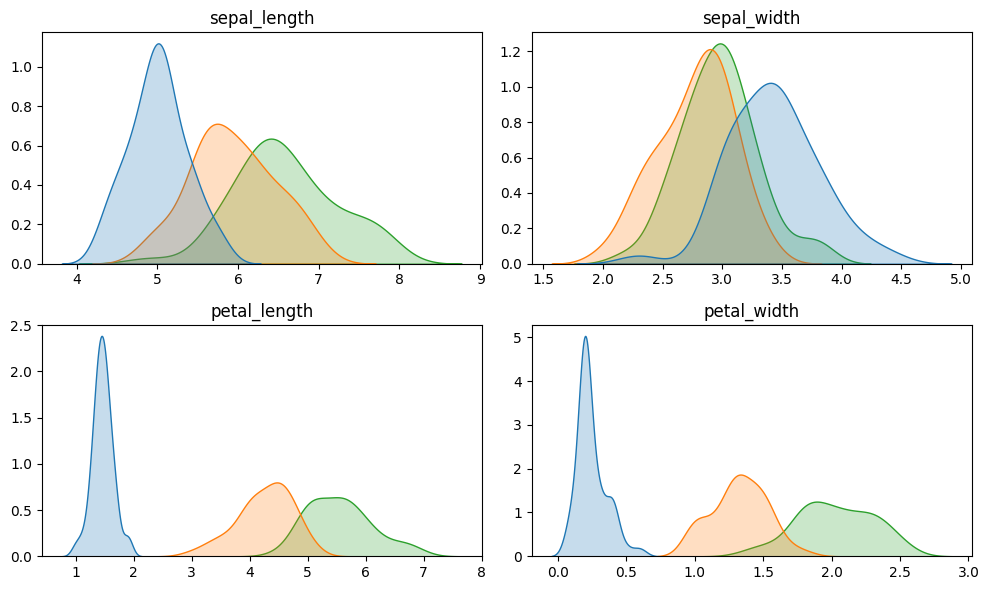

In [10]:
# ---
# Plot KDE plots for all feature variables, grouped by species to check its distribution
# ---

X = df.select_dtypes(exclude=['object'])
y = df['species']
n_grid_rows = 2
n_grid_cols = 2

fig, axs = plt.subplots(n_grid_rows, n_grid_cols, figsize=(10, 6))

axs = axs.flatten()

for i, col in enumerate(X.columns):
    ax = axs[i]  # Select the current axis
    sns.kdeplot(data=df, x=col, hue='species', ax=ax, fill=True, common_norm=False, legend=False)

    ax.set_title(col)  # Set the title of the subplot to the column name
    ax.set_xlabel('')  # Remove x-axis label to avoid overlapping
    ax.set_ylabel('')  # Remove y-axis label to avoid overlapping

plt.tight_layout()
plt.show()

From the Kernel Density Plots, we all feature variables are normal-like distributed (remember, a Gaussian Naive Bayes classifier assumes normally distributed features). We will move forward with the data set, but, when necessary, we could always apply `Standardization` or `Log Transform` to better approach a standard distribution.

## Outlier Detection

Gaussian Naive Bayes is extremely sensitive to outliers, because it assumes normally distributed features and computes the likelihood using the mean and variance. Outliers can severely skew these parameters and degrade performance.

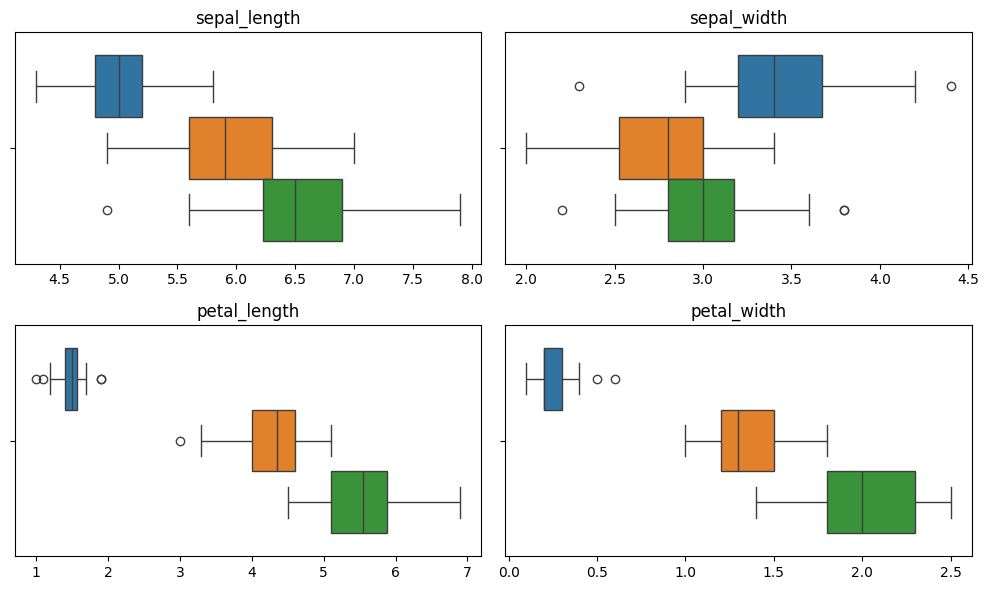

In [11]:
# ---
# Plot box plots for each feature variable, grouped by species, to check for outliers.
# ---

n_grid_rows = 2
n_grid_cols = 2

fig, axs = plt.subplots(n_grid_rows, n_grid_cols, figsize=(10, 6))

axs = axs.flatten()

for i, col in enumerate(X.columns):
    ax = axs[i]  # Select the current axis
    sns.boxplot(data=df, x=col, ax=ax, hue='species', legend=False)

    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

Several feature variables contain outliers (e.g. `sepal_length`, and `petal_width`). We will remove outliers with the **IQR method**. We mark a data point as outlier when its value is $1.5 \times IQR$ above the third quartile or below the first quartile.

In [12]:
# ---
# Remove outliers (1.5 * IQR) <= x <= (1.5 * IQR)
# ---

species = df['species'].unique()
threshold = 1.5

outlier_indices = []

for s in species:
    subset = df[df['species'] == s]
    features = subset.drop(columns=['species'])

    Q1 = features.quantile(0.25)
    Q3 = features.quantile(0.75)
    IQR = Q3 - Q1

    is_outlier = (features < (Q1 - threshold * IQR)) | (features > (Q3 + threshold * IQR))
    outlier_rows = is_outlier.any(axis=1)
    
    outlier_indices.extend(subset[outlier_rows].index)

X_clean = df.drop(index=outlier_indices)


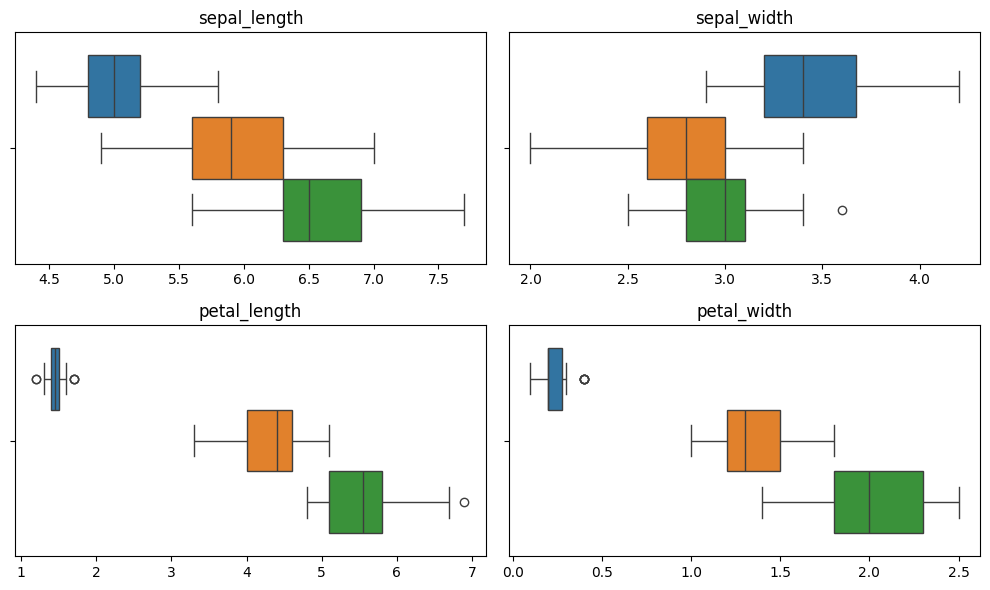

In [13]:
# ---
# Plot box plots to double-check for outliers
# ---

n_grid_rows = 2
n_grid_cols = 2

fig, axs = plt.subplots(n_grid_rows, n_grid_cols, figsize=(10, 6))

axs = axs.flatten()

for i, col in enumerate(X_clean.select_dtypes(exclude=['object']).columns):
    ax = axs[i]  # Select the current axis
    sns.boxplot(data=X_clean, x=col, ax=ax, hue='species', legend=False)

    ax.set_title(col)  # Set the title of the subplot to the column name
    ax.set_xlabel('')  # Remove x-axis label to avoid overlapping
    ax.set_ylabel('')  # Remove y-axis label to avoid overlapping

plt.tight_layout()
plt.show()

Although a lot fewer, we still detect outliers. Since box plots recompute outliers relative to the new distribution; Any points outside that new range are still flagged as outliers. We better compare KDE plots to validate if removing outliers has effect - i.e. the distributions are more Gaussian-like.

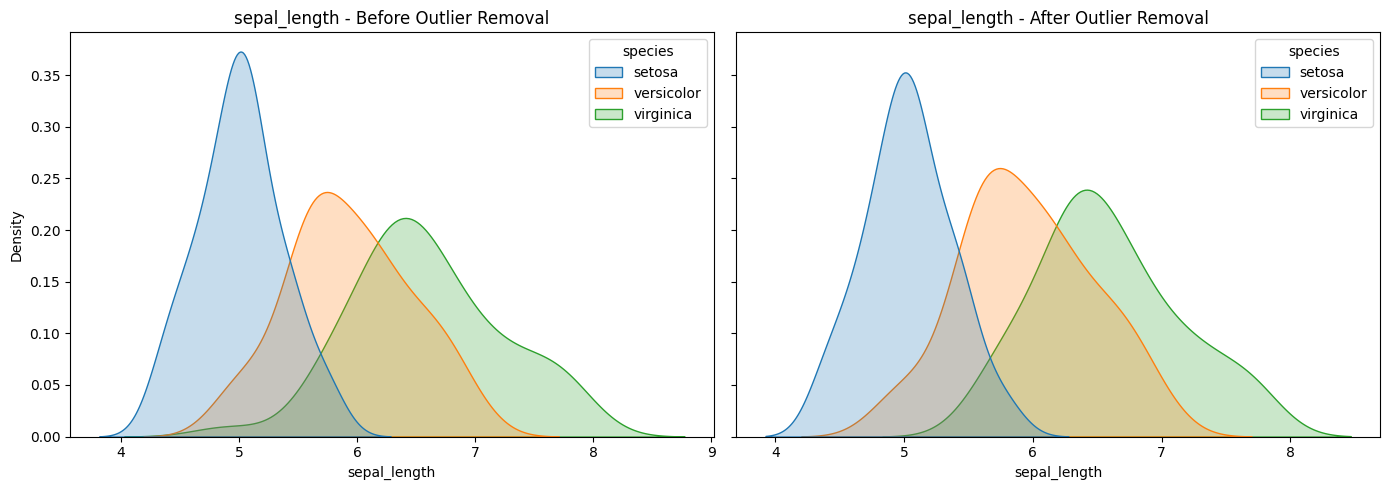

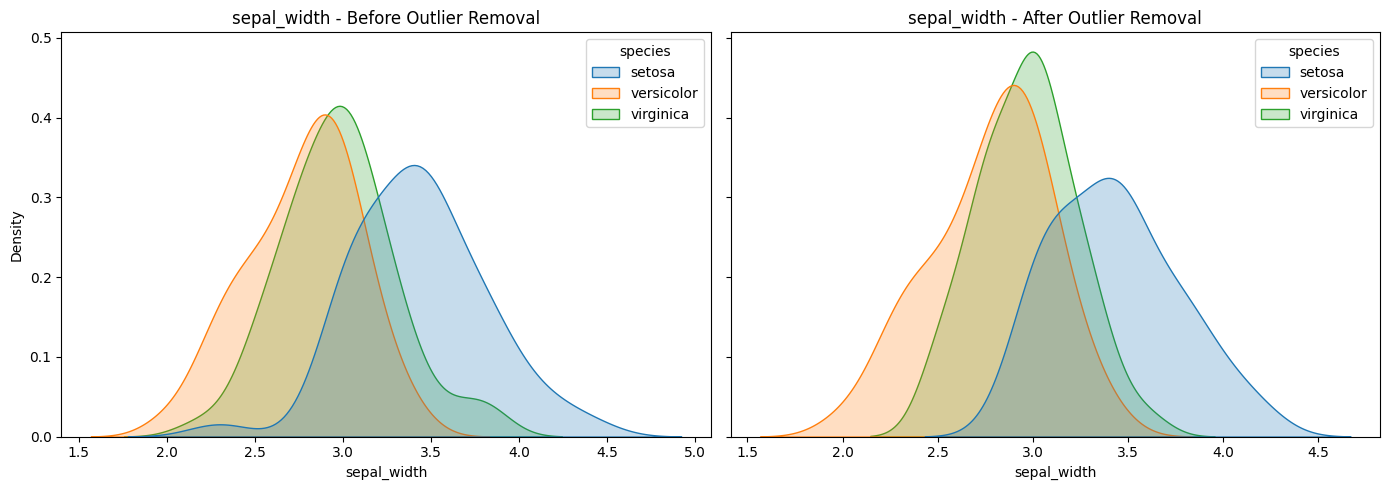

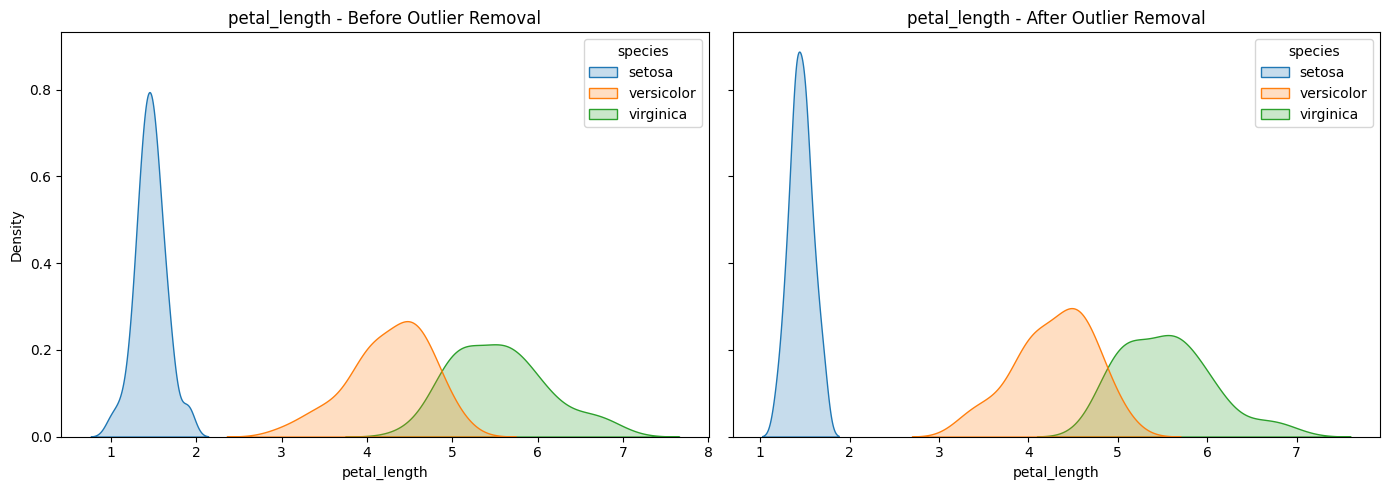

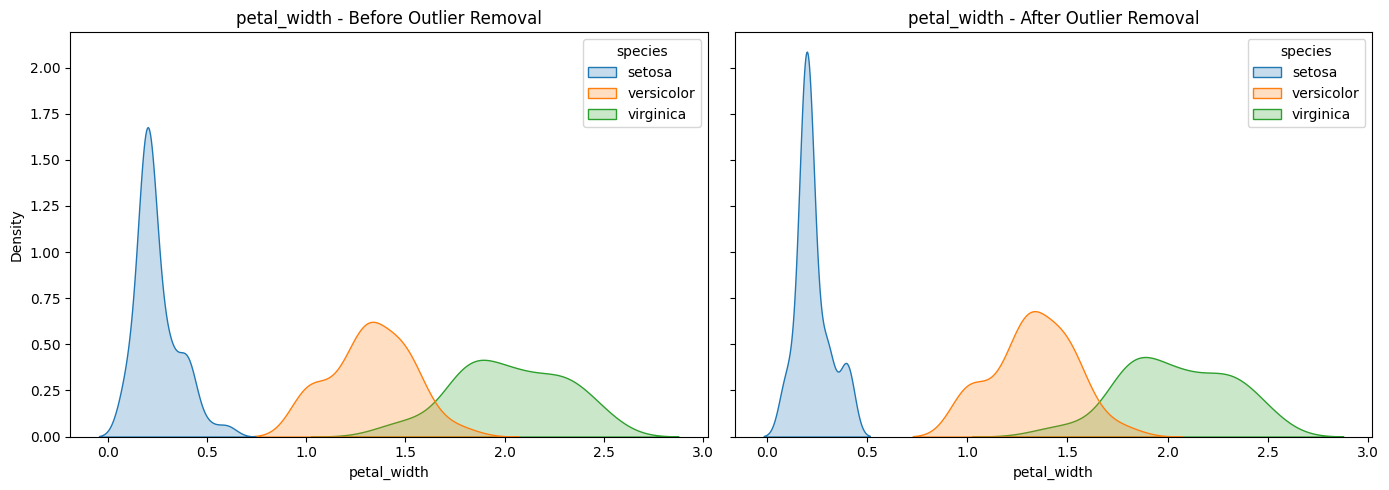

In [14]:
features = df.select_dtypes(exclude=['object']).columns
species = df['species'].unique()

for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    
    # BEFORE
    sns.kdeplot(data=df, x=feature, hue='species', fill=True, ax=axes[0])
    axes[0].set_title(f"{feature} - Before Outlier Removal")
    axes[0].set_xlabel(feature)
    
    # AFTER
    sns.kdeplot(data=X_clean, x=feature, hue='species', fill=True, ax=axes[1])
    axes[1].set_title(f"{feature} - After Outlier Removal")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

Comparing KDE plots, we notice that the curves look much smoother are more bell-shaped - i.e. there is less __noise__ caused by outliers. The distribution of data points for all species remains the same - i.e. there is no better class separation that makes it easier for our classifier. 

So we can still expect some noice in classifying `versicolor` and `virginicia` species.


### Andersen-Darling test for normality

In [27]:
species = np.unique(y)
features = X.columns  # Assuming X is your DataFrame with features

results = []

for s in species:
    for feature in features:
        # Before outlier removal
        before_data = df[df['species'] == s][feature]
        
        # After outlier removal (X_clean was created by dropping outliers)
        after_data = X_clean[df.loc[X_clean.index, 'species'] == s][feature]

        # Anderson-Darling test (normal dist)
        ad_before = anderson(before_data, dist='norm')
        ad_after = anderson(after_data, dist='norm')

        # Store statistic and critical values for significance judgment
        results.append({
            'Species': s,
            'Feature': feature,
            'AD Statistic Before': ad_before.statistic,
            'Critical Value (5%)': ad_before.critical_values[2],  # index 2 corresponds to 5% significance level
            'Reject Normality Before?': ad_before.statistic > ad_before.critical_values[2],
            'AD Statistic After': ad_after.statistic,
            'Reject Normality After?': ad_after.statistic > ad_after.critical_values[2],
        })

# Convert to DataFrame for easy viewing
ad_results_df = pd.DataFrame(results)

ad_results_df

,Species,Feature,AD Statistic Before,Critical Value (5%),Reject Normality Before?,AD Statistic After,Reject Normality After?
0,setosa,sepal_length,0.407986,0.736,False,0.346009,False
1,setosa,sepal_width,0.490956,0.736,False,0.562044,False
2,setosa,petal_length,1.007324,0.736,True,1.125797,True
3,setosa,petal_width,4.714831,0.736,True,5.003852,True
4,versicolor,sepal_length,0.360841,0.736,False,0.396066,False
5,versicolor,sepal_width,0.559755,0.736,False,0.608839,False
6,versicolor,petal_length,0.555056,0.736,False,0.463688,False
7,versicolor,petal_width,0.956851,0.736,True,1.002391,True
8,virginica,sepal_length,0.551641,0.736,False,0.564576,False
9,virginica,sepal_width,0.618205,0.736,False,0.555457,False


#### How to interpret Anderson-Darling results
The test statistic is compared against critical values for different significance levels.

Typically, use the 5% critical value:

- If test statistic $\gt$ critical value → reject normality (data not normal).
- If test statistic $\leq$ critical value → fail to reject normality (data likely normal).


### Conclusion 

The Anderson-Darling test results indicate that for most features across the three Iris species, the data does not significantly deviate from a normal distribution, both before and after outlier removal. Outlier removal did not substantially improve normality for features that were initially non-normal, such as petal width in several species.

This suggests that the Gaussian Naive Bayes assumption of normally distributed features is reasonably valid for the majority of the dataset, particularly for sepal length and width, and petal length. However, some features like petal width exhibit persistent deviations from normality, which may limit the model's fit for those dimensions.

Overall, the dataset is a suitable candidate for Gaussian Naive Bayes classification, but further improvements may be achievable by applying feature transformations or exploring alternative models for features with strong non-normality.



## Correlation

GNB assumes independence between features given the class, and high correlation violates assumptions, which may lead to:

- Overcounting their effect
- Poor generalization

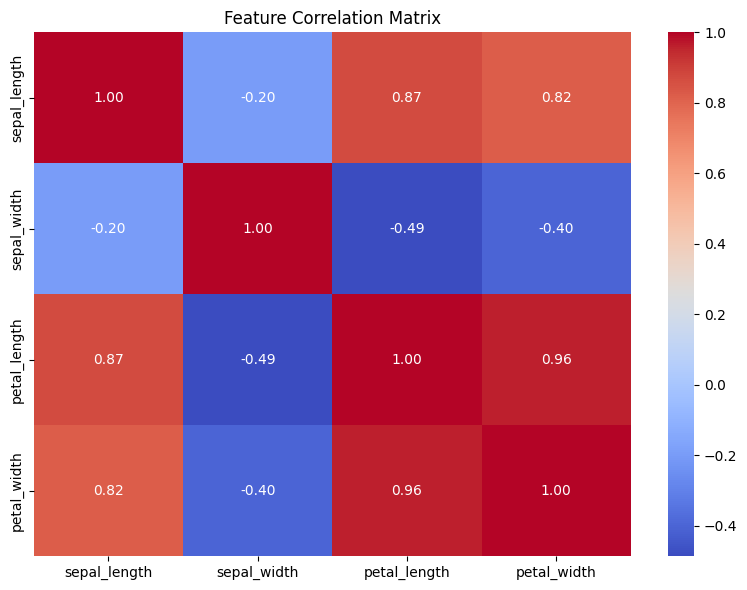

In [19]:
# calculate the correlation matrix on the numeric columns
corr_matrix = X_clean.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


<img src="assets/images/correlation-examples.svg" />
<small>How to interpret the Correlation Matrix?</small>
<br/><br/>

There are strong correlations between

- `sepal_length` & `petal_length` (0.87)
- `sepal_length` & `petal_width` (0.82)
- `petal_length` & `petal_width` (0.96)


There are low negative correlations between

- `sepal_width` & `petal_length` (-0.49)
- `petal_width` & `sepal_width` (-0.40)

We combine the highly correlated features to mitigate overcounting and generalization effects:

| Feature | Combination | Description |
|---------|-------------|-------------|
| `sepal_area` | `sepal_length * sepal_width` | Sepal area in $cm^2$ |
| `petal_area` | `petal_length * petal_width` | Petal area in $cm^2$ |


The combined features have the same predicitive value, mitigate overcounting and generalization effects, and potentially reduce training and inference time since we have to process less features.



In [20]:
# ---
# Add combined features to the data set
# ---

X_clean["sepal_area"] = X_clean['sepal_length'] * X_clean['sepal_width']
X_clean["petal_area"] = X_clean['petal_length'] * X_clean['petal_width']


In [21]:
# ---
# Show a 5-rows sample to get an impression of the combined features
# ---

X_clean.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
7,5.0,3.4,1.5,0.2,setosa,17.00,0.30
148,6.2,3.4,5.4,2.3,virginica,21.08,12.42
55,5.7,2.8,4.5,1.3,versicolor,15.96,5.85
63,6.1,2.9,4.7,1.4,versicolor,17.69,6.58
30,4.8,3.1,1.6,0.2,setosa,14.88,0.32


## Conclusion 

The Iris Flowers data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

The data set is complete - i.e. there are **no missing values**, and, grouped by flower species, are normally distributed (a **strong requirement** for Gaussian Naive Bayes classifiers). By removing outliers for each feature variable grouped by flower species, we got even closer to normal distribution, and we could apply `standard` or `log` transformation on the data set to further improve. We should check and compare results during model evaluation.

We learned that Iris setosa is clearly distinguishable from the other two species that have much more overlap. We expect some noise during inference.

Although Gaussian Naive Bayes assumes feature independence, correlation could potentially impede and skew classifications rendering our classifier useless. Hence we merged highly correlated features to mitigate this effects, and reduce training and inference time. 